# K Nearest Neighbors
K Nearest Neighbors is a (supervised) classification technique and the way it works is completely in its name:
* **K** is a number you choose
* **Neighbors** are the data points from known data

Let's say K = 3, so then we're looking or the two closest neighboring points. For example:
![KNN1](https://pythonprogramming.net/static/images/machine-learning/simple-classification-example-data-with-test-4.png)

In the above image, the *3 nearest neighbors* are circled. KNN is basically going to go to a majority vote based on the neighbors.  In this case, all 3 were of the + class, so this is 100% a + class. If 2 neighbors were red + and 1 was a black dot, we'd still classify this as a +, just with a bit less confidence. 

***Note: Due to the nature of the vote, you will likely want to use an odd number for K, otherwise you may find yourself in a 50/50 split situation.*** More sophisticated implementations apply a penalization weight to the distances as a roundabout for this issue. 

### Euclidean Distance
There are various ways to compute distance on a plane but the most widely used way is **Euclidean Distance**.

Mathematically represented as: $\sqrt{\sum^{n}_{i=1}(q_i - p_i)^2}$

This essentially is just **the square root of the sum of the distance of the points from eachother, squared**. In code this looks like:

In [68]:
from math import sqrt

point1 = [1,3]
point2 = [2,5]
euclidean_distance_ex = sqrt( (point1[0]-point2[0])**2 + (point1[1]-point2[1])**2 )
print(f"Euclidean Distance:  {euclidean_distance_ex}")

Euclidean Distance:  2.23606797749979


## Implementation
**STEPS**:
1. Initialize the value of **k**
2. For getting the predicted class, iterate from 1 to total # of training data points
    1. Calculate the Euclidean Distance between the test data and each row of training data
    2. Sort the calculated distances in ascending order based on distance values
    3. Get the top **k** rows from the sorted array
    4. Get the most frequent class of these rows
    5. Return the predicted class

In [65]:
# import packages
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [66]:
# import data
from sklearn.datasets import load_iris
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['target'] = pd.Series(iris_data.target)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


For the record, `target`'s associated flowers are:
* 0 = setosa
* 1 = versicolor
* 2 = virginica

Text(0.5, 1.0, 'sepal width vs. sepal length')

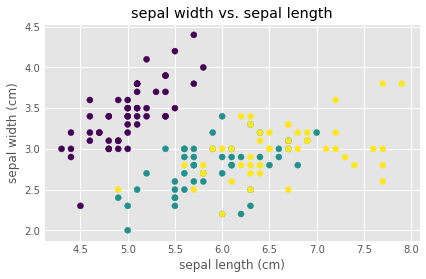

In [67]:
# plot the data
# we'll look at sepal length/width to see some clustering
plt.scatter(iris.iloc[:, 0], iris.iloc[:, 1], c=iris.target)
plt.xlabel(iris.columns[0])
plt.ylabel(iris.columns[1])
plt.title("sepal width vs. sepal length")

### Calculating Euclidean Distance

In [71]:
def euclidean_distance(data1, data2, length):
    distance = 0
    
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
        
    return np.sqrt(distance)

### Defining our KNN Model

In [73]:
def knn(training_set, test_set, k):
    
    distances = {}
    sort = {}
    
    length = test_set.shape[1]
    
    #### STEP 3
    # Calculating Euclidean Distance between each row of training data and test data
    for x in range(len(training_set)):
        
        #### STEP 3.A
        dist = euclidean_distance(test_set, training_set.iloc[x], length)
        
        distances[x] = dist[0]
        
    #### STEP 3.B
    # Sorting them based on distance
    sorted_dist = sorted(distances.items(), key=operator.itemgetter(1))
    
    neighbors = []
    
    #### STEP 3.C
    # Extracting the top k neighbors
    for x in range(k):
        neighbors.append(sorted_dist[x][0])
        
    class_votes = {}
    
    #### STEP 3.D
    # Calculating the most frequent class in the neighbors
    for x in range(len(neighbors)):
        response = training_set.iloc[neighbors[x]][-1]
        
        if response in class_votes:
            class_votes[response] += 1
        else:
            class_votes[response] = 1
            
    #### STEP 3.E
    sorted_votes = sorted(class_votes.items(), key=operator.itemgetter(1), reverse=True)
    return(sorted_votes[0][0], neighbors)

#### Trying it on a dummy set

In [77]:
test_data = [[5.0, 3.75, 5.1, 2.5]]
test = pd.DataFrame(test_data)

In [78]:
# Set number of neighbors = 1
k = 1

# Run the model
result, neigh = knn(iris, test, k)

# Predicted class
print(result)

2.0


Okay, so our predicted class is 2, which should be virginica - the purple one. 

Let's plot this new point in red and our old data and see if this looks right.

Text(0.5, 1.0, 'sepal width vs. sepal length')

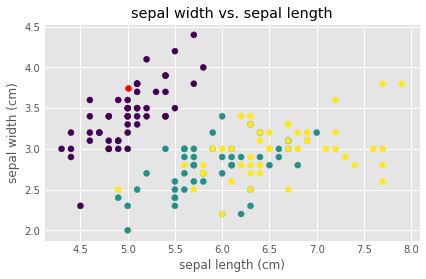

In [79]:
plt.scatter(iris.iloc[:, 0], iris.iloc[:, 1], c=iris.target)
plt.scatter(test.iloc[:, 0], test.iloc[:, 1], c='r')
plt.xlabel(iris.columns[0])
plt.ylabel(iris.columns[1])
plt.title("sepal width vs. sepal length")

Andddddd we did it. Checks out!